# Оглавление

1. Загрузка и ознакомление с данными;
2. Подготовака данных;
3. Рассчёт помесячной выручки;
4. Анализ данных;
5. Проверка гипотез;
6. Вывод

## Загрузка и ознакомление с данными

**Постановка задачи:**

Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении имеются данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Получим данные и ознакомимся с ними.

In [217]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

data_calls = pd.read_csv('calls.csv')
data_internet = pd.read_csv('internet.csv')
data_messages = pd.read_csv('messages.csv')
data_tariffs = pd.read_csv('tariffs.csv')
data_users = pd.read_csv('users.csv')

list_data = [data_calls, data_internet, data_messages, data_tariffs, data_users]

In [218]:
def data_info(index, flag=0):
    if not flag:
        return list_data[index]
    elif flag == 1:
        return list_data[index].info()
    elif flag == 2:
        return list_data[index].isna().sum()

In [219]:
display(data_info(0))
data_info(0, 1)
data_info(0, 2)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


id           0
call_date    0
duration     0
user_id      0
dtype: int64

Данные в порядке, ни пропусков, ни ошибок не видно. Столбец `call_date` необходимо привести к формату datetime.

In [220]:
display(data_info(1))
data_info(1, 1)
data_info(1, 2)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

В данных присутствует лишний столбц. Скорее всего он образовался при подготовке выборки из-за не удаленных индексов. Столбец необходимо удалить, столюец `session_date` привести к формату datatime.

In [221]:
display(data_info(2))
data_info(2, 1)
data_info(2, 2)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


id              0
message_date    0
user_id         0
dtype: int64

Данные в порядке, ни пропусков, ни ошибок не видно. Столбец `message_date` необходимо привести к формату datetime.

In [222]:
display(data_info(3))
data_info(3, 1)
data_info(3, 2)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

Данные в порядке, ни пропусков, ни ошибок не видно.

In [223]:
display(data_info(4))
data_info(4, 1)
data_info(4, 2)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Данные в порядке. Имеются пропуски в столбце `churn_date`, но по вводной информации, в этом столбце есть данные только если клиент отказался от использования тарифа.

## Подготовка данных

Для дальнейшей работы подготовим данные. Нам необходимо:

- привести даты в соответсвтующий формат;
- на основе приведенных дат, выделить месяц, в котором пользователи совершали действия по тарифу;
- сгруппировать данные по пользователям и месяцам, когда они пользовались тарифами.
- округлить продолжительность разговора в большую сторону для сравнения с лимитом минут на тарифах;
- перевести мб траффика в гигабайты, с округлением в большую сторону, для сравнения с лимитом на тарифах;
- объединить получившиеся таблицы для анализа поведения пользователей.

Сформируем сводную таблицу по id пользователей и месяцам. Посчитаем для каждого пользователя и месяца сумму использованных минут, с округлинием в верх. Так же посчитаем количество звонков.

In [224]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_calls['month'] = data_calls['call_date'].dt.month
    
data_c = data_calls.pivot_table(index=['user_id','month'], values='duration', aggfunc=['sum', 'count'])
data_c = data_c.apply(np.ceil)
data_c.columns = ['duration_call', 'count_call']
data_c

duration_call  count_call
user_id month                           
1000    5              151.0        22.0
        6              159.0        43.0
        7              319.0        47.0
        8              390.0        52.0
        9              441.0        58.0
...                      ...         ...
1498    10             233.0        41.0
1499    9               65.0         9.0
        10             430.0        68.0
        11             577.0        74.0
        12             466.0        69.0

[3174 rows x 2 columns]

Далее, сформирует сводную таблицу по id пользователей и месяцам для смс сообщейний. Посчитаем количество сообщейний в месяц для каждого пользователя.

In [225]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_messages['month'] = data_messages['message_date'].dt.month
data_m = data_messages.pivot_table(index=['user_id','month'], values='id', aggfunc='count')
data_m.columns = ['message_count']
data_m

message_count
user_id month               
1000    5                 22
        6                 60
        7                 75
        8                 81
        9                 57
...                      ...
1498    10                42
1499    9                 11
        10                48
        11                59
        12                66

[2717 rows x 1 columns]

Для данных об интернет траффике, удалим лишний столбец.

In [226]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_internet['month'] = data_internet['session_date'].dt.month
data_internet = data_internet.drop(columns='Unnamed: 0')
data_internet

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,10
149392,1499_153,490.13,2018-12-14,1499,12
149393,1499_154,0.00,2018-10-27,1499,10
149394,1499_155,1246.32,2018-11-26,1499,11


Далее, свормируем сводную таблицу по пользователям и месяцам. Переведем мб трафика в гб. Округлим вверх.

In [227]:
def sum_mb(row):
    value = sum(row)
    value_round = value // 1024
    if value_round != 0:
        return int(value_round + 1)
    else:
        return int(value_round)

data_i = data_internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc=sum_mb)
data_i.columns = ['gb_used']

display(data_i)


gb_used
user_id month         
1000    5          3.0
        6         23.0
        7         14.0
        8         14.0
        9         15.0
...                ...
1498    10        21.0
1499    9          2.0
        10        18.0
        11        18.0
        12        13.0

[3203 rows x 1 columns]

Для дальнейшей работы подготовим таблицу с данными о пользователям. Отберем столбцы, которые могут пригодиться в анализе.

In [228]:
data_u = data_users[['user_id', 'age', 'city', 'tariff']]
data_u

,user_id,age,city,tariff
0,1000,52,Краснодар,ultra
1,1001,41,Москва,smart
2,1002,59,Стерлитамак,smart
3,1003,23,Москва,ultra
4,1004,68,Новокузнецк,ultra
...,...,...,...,...
495,1495,65,Иркутск,ultra
496,1496,36,Вологда,smart
497,1497,32,Челябинск,smart
498,1498,68,Владикавказ,smart


В завершение подготовки данных, склеим таблицы. Получим общую сводную таблицу, где для каждого пользователя в каждом месяце указаны:

- количество использованных минту;
- количество звонков;
- количество смс сообщений;
- количество использованного интернет траффика в гб.

In [229]:
data_cm = data_c.merge(data_m, on=['user_id','month'], how='outer')
data_cmi = data_cm.merge(data_i, on=['user_id','month'], how='outer')
data_cmi

duration_call  count_call  message_count  gb_used
user_id month                                                   
1000    5              151.0        22.0           22.0      3.0
        6              159.0        43.0           60.0     23.0
        7              319.0        47.0           75.0     14.0
        8              390.0        52.0           81.0     14.0
        9              441.0        58.0           57.0     15.0
...                      ...         ...            ...      ...
1489    9                NaN         NaN           32.0     17.0
        10               NaN         NaN           21.0     20.0
        11               NaN         NaN           20.0     18.0
        12               NaN         NaN           35.0     17.0
1476    4                NaN         NaN            NaN      0.0

[3214 rows x 4 columns]

Убедимся, что все пользователи, которые совершали действия по тарифу, вошли в таблицу. Для этого получим список уникальных значений `user_id` и выведим количество строк из начальных фреймов с `user_id`, которых нет в нашей таблице.

In [230]:
df0 = data_cmi.index.to_list()
list_id = []
for k in range(len(df0)):
    list_id.append(df0[k][0])
ls = pd.Series(list_id)
ls.unique().shape

# list_data - список с начальными dataframe, 0-2 индексы фреймов с звонками,смс и интернет трафиком
for k in range(0,3):
    display(list_data[k].query("user_id not in @ls").shape[0])


0

0

0

## Рассчёт помесячной выручки

Рассчитаем помесячную выручку для каждого пользователя.
Для этого в таблицу `data_cmi` методом `apply` добавим:

- тарифный план пользователя;
- город пользователя;
- сумму, которую в каждом месяце пользователь платил за тариф, а так же за использование услуг вне лимитов по тарифу;

In [231]:
def ref(row):
    # получим название тарифа пользователя по его user_id
    tariff = (data_u[data_u['user_id'] == row.name[0]]['tariff']).reset_index(drop=True)
    
    # определим лимиты минту, смс и траффика в соответствие с тарифом пользователя
    minuts = (data_tariffs[data_tariffs['tariff_name'] == tariff[0]]['minutes_included']).reset_index(drop=True)
    messages = (data_tariffs[data_tariffs['tariff_name'] == tariff[0]]['messages_included']).reset_index(drop=True)
    # переведем мб лимита в гб лимита
    internet = (data_tariffs[data_tariffs['tariff_name'] == tariff[0]]['mb_per_month_included']).reset_index(drop=True) / 1024

    # если пользователь вышел из рамок лимита по тарифу, произведем рассчёт стоимости услуг
    if minuts[0] < row['duration_call']:
        row['sum_call'] = (row['duration_call'] - minuts[0]) * (data_tariffs[data_tariffs['tariff_name'] == tariff[0]]['rub_per_minute']).reset_index(drop=True)[0]
    else:
        row['sum_call'] = 0
    if messages[0] < row['message_count']:
        row['sum_messages'] = (row['message_count'] - messages[0]) * (data_tariffs[data_tariffs['tariff_name'] == tariff[0]]['rub_per_message']).reset_index(drop=True)[0]
    else:
        row['sum_messages'] = 0
    if internet[0] < row['gb_used']:
        row['sum_internet'] = (row['gb_used'] - internet[0]) * (data_tariffs[data_tariffs['tariff_name'] == tariff[0]]['rub_per_gb']).reset_index(drop=True)[0]
    else:
        row['sum_internet'] = 0
    
    # добавим столбы с ежемесячной платой по тарифу, названием тарифа и городом пользователя
    row['amount_tariff'] = (data_tariffs[data_tariffs['tariff_name'] == tariff[0]]['rub_monthly_fee']).reset_index(drop=True)[0]
    row['tariff'] = tariff[0]
    row['city'] = (data_u[data_u['user_id'] == row.name[0]]['city']).reset_index(drop=True)[0]
    return row
        

#messages_included mb_per_month_included minutes_included rub_monthly_fee rub_per_gb rub_per_message rub_per_minute
data_cmi = data_cmi.apply(ref, axis=1)
data_cmi

duration_call  count_call  message_count  gb_used  sum_call  \
user_id month                                                                
1000    5              151.0        22.0           22.0      3.0       0.0   
        6              159.0        43.0           60.0     23.0       0.0   
        7              319.0        47.0           75.0     14.0       0.0   
        8              390.0        52.0           81.0     14.0       0.0   
        9              441.0        58.0           57.0     15.0       0.0   
...                      ...         ...            ...      ...       ...   
1489    9                NaN         NaN           32.0     17.0       0.0   
        10               NaN         NaN           21.0     20.0       0.0   
        11               NaN         NaN           20.0     18.0       0.0   
        12               NaN         NaN           35.0     17.0       0.0   
1476    4                NaN         NaN            NaN      0.0       0.0   

               sum_messages  sum_internet  amount_tariff tariff  \
user_id month                                                     
1000    5               0.0           0.0         1950.0  ultra   
        6               0.0           0.0         1950.0  ultra   
        7               0.0           0.0         1950.0  ultra   
        8               0.0           0.0         1950.0  ultra   
        9               0.0           0.0         1950.0  ultra   
...                     ...           ...            ...    ...   
1489    9               0.0         400.0          550.0  smart   
        10              0.0        1000.0          550.0  smart   
        11              0.0         600.0          550.0  smart   
        12              0.0         400.0          550.0  smart   
1476    4               0.0           0.0         1950.0  ultra   

                          city  
user_id month                   
1000    5            Краснодар  
        6            Краснодар  
        7            Краснодар  
        8            Краснодар  
        9            Краснодар  
...                        ...  
1489    9      Санкт-Петербург  
        10     Санкт-Петербург  
        11     Санкт-Петербург  
        12     Санкт-Петербург  
1476    4               Москва  

[3214 rows x 10 columns]

Далее, рассчитаем, какую сумму в месяц пользователь должен заплатить за услуги оператора.

In [232]:
data_cmi['amount_per_month'] = data_cmi['sum_call'] + data_cmi['sum_messages'] + data_cmi['sum_internet'] + data_cmi['amount_tariff']
data_cmi

duration_call  count_call  message_count  gb_used  sum_call  \
user_id month                                                                
1000    5              151.0        22.0           22.0      3.0       0.0   
        6              159.0        43.0           60.0     23.0       0.0   
        7              319.0        47.0           75.0     14.0       0.0   
        8              390.0        52.0           81.0     14.0       0.0   
        9              441.0        58.0           57.0     15.0       0.0   
...                      ...         ...            ...      ...       ...   
1489    9                NaN         NaN           32.0     17.0       0.0   
        10               NaN         NaN           21.0     20.0       0.0   
        11               NaN         NaN           20.0     18.0       0.0   
        12               NaN         NaN           35.0     17.0       0.0   
1476    4                NaN         NaN            NaN      0.0       0.0   

               sum_messages  sum_internet  amount_tariff tariff  \
user_id month                                                     
1000    5               0.0           0.0         1950.0  ultra   
        6               0.0           0.0         1950.0  ultra   
        7               0.0           0.0         1950.0  ultra   
        8               0.0           0.0         1950.0  ultra   
        9               0.0           0.0         1950.0  ultra   
...                     ...           ...            ...    ...   
1489    9               0.0         400.0          550.0  smart   
        10              0.0        1000.0          550.0  smart   
        11              0.0         600.0          550.0  smart   
        12              0.0         400.0          550.0  smart   
1476    4               0.0           0.0         1950.0  ultra   

                          city  amount_per_month  
user_id month                                     
1000    5            Краснодар            1950.0  
        6            Краснодар            1950.0  
        7            Краснодар            1950.0  
        8            Краснодар            1950.0  
        9            Краснодар            1950.0  
...                        ...               ...  
1489    9      Санкт-Петербург             950.0  
        10     Санкт-Петербург            1550.0  
        11     Санкт-Петербург            1150.0  
        12     Санкт-Петербург             950.0  
1476    4               Москва            1950.0  

[3214 rows x 11 columns]

## Анализ данных

Для выполнения анализа поведения клиентов из полученной в предидущем разделе выборки, сформируем две новые. В первой будут пользователи с тарифом *ultra* во воторой пользователи с тарифом *smart*.

Ознакомимся с числовым описанием данных для каждой выборки.

In [233]:
data_cmi_tf_0 = data_cmi.query('tariff == "ultra"')
display(data_cmi_tf_0)
data_cmi_tf_0.describe().round(0)

duration_call  count_call  message_count  gb_used  sum_call  \
user_id month                                                                
1000    5              151.0        22.0           22.0      3.0       0.0   
        6              159.0        43.0           60.0     23.0       0.0   
        7              319.0        47.0           75.0     14.0       0.0   
        8              390.0        52.0           81.0     14.0       0.0   
        9              441.0        58.0           57.0     15.0       0.0   
...                      ...         ...            ...      ...       ...   
1473    9                NaN         NaN           19.0     17.0       0.0   
        10               NaN         NaN           20.0     14.0       0.0   
        11               NaN         NaN           14.0     22.0       0.0   
        12               NaN         NaN           20.0     18.0       0.0   
1476    4                NaN         NaN            NaN      0.0       0.0   

               sum_messages  sum_internet  amount_tariff tariff        city  \
user_id month                                                                 
1000    5               0.0           0.0         1950.0  ultra   Краснодар   
        6               0.0           0.0         1950.0  ultra   Краснодар   
        7               0.0           0.0         1950.0  ultra   Краснодар   
        8               0.0           0.0         1950.0  ultra   Краснодар   
        9               0.0           0.0         1950.0  ultra   Краснодар   
...                     ...           ...            ...    ...         ...   
1473    9               0.0           0.0         1950.0  ultra  Красноярск   
        10              0.0           0.0         1950.0  ultra  Красноярск   
        11              0.0           0.0         1950.0  ultra  Красноярск   
        12              0.0           0.0         1950.0  ultra  Красноярск   
1476    4               0.0           0.0         1950.0  ultra      Москва   

               amount_per_month  
user_id month                    
1000    5                1950.0  
        6                1950.0  
        7                1950.0  
        8                1950.0  
        9                1950.0  
...                         ...  
1473    9                1950.0  
        10               1950.0  
        11               1950.0  
        12               1950.0  
1476    4                1950.0  

[985 rows x 11 columns]

,duration_call,count_call,message_count,gb_used,sum_call,sum_messages,sum_internet,amount_tariff,amount_per_month
count,951.0,951.0,795.0,975.0,985.0,985.0,985.0,985.0,985.0
mean,515.0,76.0,61.0,20.0,0.0,0.0,120.0,1950.0,2070.0
std,290.0,42.0,46.0,10.0,0.0,0.0,376.0,0.0,376.0
min,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1950.0,1950.0
25%,292.0,43.0,24.0,12.0,0.0,0.0,0.0,1950.0,1950.0
50%,498.0,75.0,51.0,19.0,0.0,0.0,0.0,1950.0,1950.0
75%,715.0,105.0,88.0,27.0,0.0,0.0,0.0,1950.0,1950.0
max,1579.0,244.0,224.0,49.0,0.0,0.0,2850.0,1950.0,4800.0


Из числового описание данных видно, что средние и медианы по каждому из параметром очень близки, что говорит об отсутствие большого количества выборосов в данных.
Так же, можно стразу отметить, что в среднем, пользователи не полностью используют лимиты на тарифе по всем видам связи.

Далее повторим действия для пользователей тарифа *smart*.

In [234]:
data_cmi_tf_1 = data_cmi.query('tariff == "smart"')
display(data_cmi_tf_1)
data_cmi_tf_1.describe().round(0)

duration_call  count_call  message_count  gb_used  sum_call  \
user_id month                                                                
1001    11             409.0        59.0            NaN     18.0       0.0   
        12             392.0        63.0            NaN     14.0       0.0   
1002    6              111.0        15.0            4.0     11.0       0.0   
        7              205.0        26.0           11.0     18.0       0.0   
        8              270.0        42.0           13.0     20.0       0.0   
...                      ...         ...            ...      ...       ...   
1489    8                NaN         NaN           17.0     11.0       0.0   
        9                NaN         NaN           32.0     17.0       0.0   
        10               NaN         NaN           21.0     20.0       0.0   
        11               NaN         NaN           20.0     18.0       0.0   
        12               NaN         NaN           35.0     17.0       0.0   

               sum_messages  sum_internet  amount_tariff tariff  \
user_id month                                                     
1001    11              0.0         600.0          550.0  smart   
        12              0.0           0.0          550.0  smart   
1002    6               0.0           0.0          550.0  smart   
        7               0.0         600.0          550.0  smart   
        8               0.0        1000.0          550.0  smart   
...                     ...           ...            ...    ...   
1489    8               0.0           0.0          550.0  smart   
        9               0.0         400.0          550.0  smart   
        10              0.0        1000.0          550.0  smart   
        11              0.0         600.0          550.0  smart   
        12              0.0         400.0          550.0  smart   

                          city  amount_per_month  
user_id month                                     
1001    11              Москва            1150.0  
        12              Москва             550.0  
1002    6          Стерлитамак             550.0  
        7          Стерлитамак            1150.0  
        8          Стерлитамак            1550.0  
...                        ...               ...  
1489    8      Санкт-Петербург             550.0  
        9      Санкт-Петербург             950.0  
        10     Санкт-Петербург            1550.0  
        11     Санкт-Петербург            1150.0  
        12     Санкт-Петербург             950.0  

[2229 rows x 11 columns]

,duration_call,count_call,message_count,gb_used,sum_call,sum_messages,sum_internet,amount_tariff,amount_per_month
count,2223.0,2223.0,1922.0,2228.0,2229.0,2229.0,2229.0,2229.0,2229.0
mean,396.0,59.0,39.0,16.0,92.0,17.0,598.0,550.0,1258.0
std,179.0,26.0,27.0,6.0,215.0,40.0,737.0,0.0,801.0
min,0.0,1.0,1.0,0.0,0.0,0.0,0.0,550.0,550.0
25%,269.0,40.0,17.0,13.0,0.0,0.0,0.0,550.0,550.0
50%,399.0,60.0,34.0,17.0,0.0,0.0,400.0,550.0,962.0
75%,516.0,76.0,55.0,20.0,48.0,3.0,1000.0,550.0,1733.0
max,1355.0,198.0,143.0,38.0,2565.0,279.0,4600.0,550.0,6614.0


В данной выборке среднее и медиана так же близки друг к другу, можем утверждать, что количество выборосов минимально.

Во числовому описания данных можно отметить, что пользователи тарифа смарт, в среднем, выходят за лимиты по тарифу только для интернет траффика. Однако, если 75% пользователей тарифа *ultra* укладывались в лимиты, то 75% пользователей тарифа *smart* в лимиты уже не укладываются.

Построим гистограммы и рассчитаем среднее, дисперсию и стандартное отклонение для каждого вида связи.

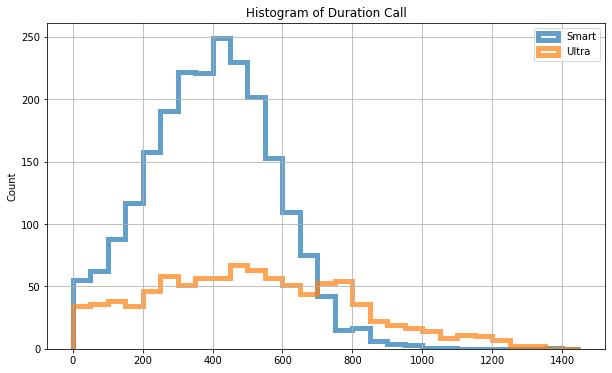

In [235]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(
    data_cmi_tf_1['duration_call'], bins=[x for x in range(0,1500,50)],
    alpha=0.7, label='Smart', linewidth=5, histtype='step')
n, bins, patches = plt.hist(
    data_cmi_tf_0['duration_call'], bins=[x for x in range(0,1500,50)],
    alpha=0.7, label='Ultra', linewidth=5, histtype='step')

plt.ylabel('Count')
plt.title('Histogram of Duration Call')
plt.grid(True)
plt.legend()
plt.show()

Распределение минут на звонки и пользователей соответствует нормальному распределение, по обоим тарифам. Однако для тарифа *smart* имеется ярко выраженный пик, и стремление гистограммы к среднему, что говорит, о маленькой дисперсии, и следовательно о маленьком стандартном отклонении. Для тарифа *ultra* напротив, гистограмма не имеет ярко выраженного пика, а гистограмма более палогая, что говорит о большой дисперсии и большом стандартном отклонении.

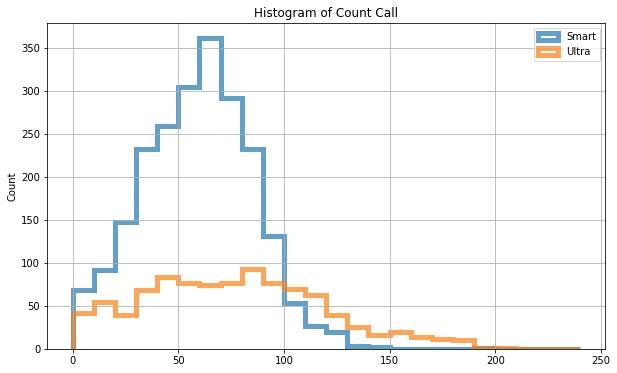

In [236]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(
    data_cmi_tf_1['count_call'], bins=[x for x in range(0,250,10)],
    alpha=0.7, label='Smart', linewidth=5, histtype='step')
n, bins, patches = plt.hist(
    data_cmi_tf_0['count_call'], bins=[x for x in range(0,250,10)],
    alpha=0.7, label='Ultra', linewidth=5, histtype='step')

plt.ylabel('Count')
plt.title('Histogram of Count Call')
plt.grid(True)
plt.legend()
plt.show()

Точно такую же картину, как и для количества минут, можем наблюдать и для количества звонков.

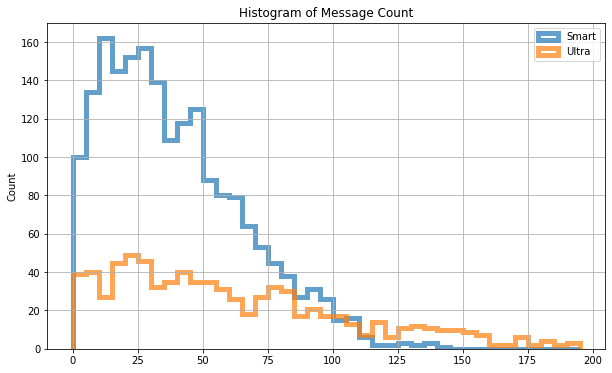

In [237]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(
    data_cmi_tf_1['message_count'], bins=[x for x in range(0,200,5)],
    alpha=0.7, label='Smart', linewidth=5, histtype='step')
n, bins, patches = plt.hist(
    data_cmi_tf_0['message_count'], bins=[x for x in range(0,200,5)],
    alpha=0.7, label='Ultra', linewidth=5, histtype='step')

plt.ylabel('Count')
plt.title('Histogram of Message Count')
plt.grid(True)
plt.legend()
plt.show()

Для смс сообщейний, видим заметное смещение гистограммы (нормального распределения) тарифа *smart* влево. Что говорит о небольшом среднем числе отправляемых пользователями сообщений. При этом, сохраняется соответствие дисперсий и стандартных отклонений - у тарифа *smart* меньше, у тарифа *ultra* больше.

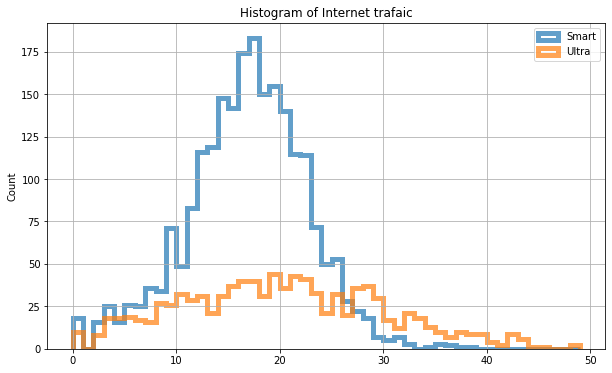

In [238]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(
    data_cmi_tf_1['gb_used'], bins=[x for x in range(0,50,1)],
    alpha=0.7, label='Smart', linewidth=5, histtype='step')
n, bins, patches = plt.hist(
    data_cmi_tf_0['gb_used'], bins=[x for x in range(0,50,1)],
    alpha=0.7, label='Ultra', linewidth=5, histtype='step')

plt.ylabel('Count')
plt.title('Histogram of Internet trafаic')
plt.grid(True)
plt.legend()
plt.show()

Для интернет траффика стоит отметить два момента:

- в среднем, пользователи тарифа *smart* превышают допустимый лимит;
- большинство пользователей тарифа *ultra* не превышают допустимый лимит по тарифу

В остальном, данные имеют схожие признаки распределения, что и для звонков.


Отдельно ознакомимся с распределением помесячных платежей.

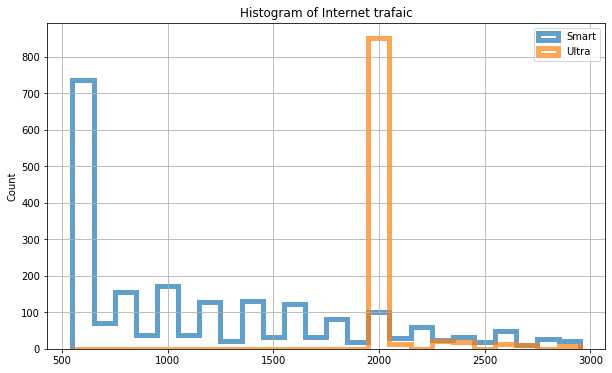

In [239]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(
    data_cmi_tf_1['amount_per_month'], bins=[x for x in range(550,3000,100)],
    alpha=0.7, label='Smart', linewidth=5, histtype='step')
n, bins, patches = plt.hist(
    data_cmi_tf_0['amount_per_month'], bins=[x for x in range(550,3000,100)],
    alpha=0.7, label='Ultra', linewidth=5, histtype='step')

plt.ylabel('Count')
plt.title('Histogram of Internet trafаic')
plt.grid(True)
plt.legend()
plt.show()

Получим численные подтверждения нашим выводам, на основе гистограмм.

In [240]:
data_result = (data_cmi
               .pivot_table(index='tariff',
                            values=['duration_call', 'count_call', 'message_count', 'gb_used', 'amount_per_month'],
                           aggfunc=['mean', 'std', 'var']).round())
display(data_result)

mean                                                 \
       amount_per_month count_call duration_call gb_used message_count   
tariff                                                                   
smart            1258.0       59.0         396.0    16.0          39.0   
ultra            2070.0       76.0         515.0    20.0          61.0   

                    std                                                 \
       amount_per_month count_call duration_call gb_used message_count   
tariff                                                                   
smart             801.0       26.0         179.0     6.0          27.0   
ultra             376.0       42.0         290.0    10.0          46.0   

                    var                                                 
       amount_per_month count_call duration_call gb_used message_count  
tariff                                                                  
smart          641466.0      665.0       32058.0    33.0         718.0  
ultra          141517.0     1798.0       84001.0    95.0        2110.0

Под конец, рассчитаем вероятно получить помесячную прибыль, равную или больше средней прибыли тарифа *ultra* для тарифа *smart*.

In [241]:
dist = st.norm(data_result['mean']['amount_per_month']['smart'], data_result['std']['amount_per_month']['smart'])
p = dist.cdf(data_result['mean']['amount_per_month']['ultra'])
print(f'Вероятность получить прибыль для тарифа смарт более {data_result["mean"]["amount_per_month"]["ultra"]} равна: {((1 - p) * 100):.2f}%')

Вероятность получить прибыль для тарифа смарт более 2070.0 равна: 15.54%


### Вывод по анализу данных

В ходе анализа данных выборки было обнаруженно:

1. Пользователи тарифа *smart* в среднем выходят за рамки лимита по интернет трафику;
2. Пользователи тарифа *smart* по всем видям связи имеют меньшее стандартное отклонение от среднего, чем пользователи тарифа *ultra*;
3. Пользователи тарифа *smart*, при меньшем стандартном отклонении, бОльшей долей выходят за рамки лимитов по видам связи, чем пользователи тарифа *ultra*;
4. Пользователи тариа *ultra* в среднем платят больше на ~800 рублей, чем пользователи тарифа *smart*;
5. Вероятно того, что случайный пользователь тарифа *smart* в месяц заплатит больше, чем средний платеж по тарифу *ultra* составлет 16.3%.

Таким образом тариф сматр, в среднем, приносит меньше дохода, и при этом его пользователи часто выходят за рамки лимитов на виды связи, что может оборачиваться черезмерной нагрузкой на инфраструктуру оператора связи. Эти позволяет сделать вывод, что оператору предпочтительнее продвигать тариф *ultra*, как более доходный и более прогнозируемый, в плане нагрузки.

## Проверка гипотез

Необходимо проверить две гипотезы:

**средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;**

**средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;**

Сформулируем нулевые гипотезы:

*Средняя выручка тарифа "Смарт" **не равна** средней выручке тарифа "Ультра"*

*Средняя выручка пользователей из Москвы **не равна** выручке пользоватлей из других регионов*

Сформулируем альтернативные гипотезы:

*Средняя выручка тарифа "Смарт" **равна** средней выручке тарифа "Ультра"*

*Средняя выручка пользователей из Москвы **равна** выручке пользоватлей из других регионов*

Проверим данные гипотезы используя средние значиния каждой выборки. Пороговое значение задамим равное **0.05**

In [242]:
result = st.ttest_ind(data_cmi_tf_1['amount_per_month'], data_cmi_tf_0['amount_per_month'])
alpha = 0.05
print('p-значение: ', result.pvalue)
if result.pvalue > alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевая гипотеза не отвергнута')



p-значение:  1.513773301175091e-178
Нулевая гипотеза не отвергнута


In [243]:
data_for_Moscow = data_cmi.query('city == "Москва"')['amount_per_month']
data_for_not_Moscow = data_cmi.query('city != "Москва"')['amount_per_month']


result = st.ttest_ind(data_for_Moscow, data_for_not_Moscow)
alpha = 0.01
print('p-значение: ', result.pvalue)
if result.pvalue > alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Гипотеза не отвергнута')


p-значение:  0.4836504757759247
Отвергаем нулевую гипотезу


## Вывод

В данной работе были полученны данные по выборке пользоваталей, являющихся клиентами одного оператора связи.
В ходе работы, при загруженны данных, произведен первичный осмотр и подготовка данных.
Далее был проведен анализ пользовательского поведения и определен наиболее выгодный для оператора связи тариф.
В конце работы были проверены две гипотезы, методом сравнения средних выручек для двух выборок пользователей.



Дополнение к выводу:

1) Разница дисперсий для тарифов, скорее всего связана с разницей количества наблюдейний для каждого тарифа.

2) Среднее значения по месяцам слабо зависят от количестве пользователей (так как по ЦПТ средние показатели по месяцам будут нормально распределены отностительно среднего генеральной совокупности), а вот дисперсия и стандартное отклонение будут тем больше, чем меньше выборка.

3) Для оператора, лучше будет тариф Ultra, ввиду того, что он будет приносить большую прибыль, а так же позволит эффективнее использовать аппаратные мощности, ввиду того, что польователи этого тарифа реже выходят за лимиты тарифа, тем самым позволя точнее расчитать нагрузку на инфраструктуру и потребные мощности.